In [96]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

In [97]:
data = pd.read_csv('/Users/anthonyesposito/Desktop/GitWork/Work_In_Progress/Courses/ISLR/ISLR_DATA/housing.csv',
                   delim_whitespace=True,
                   header = None,
                   names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv'])
data.head()

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   ptratio       b  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [98]:
data.shape

(506, 14)

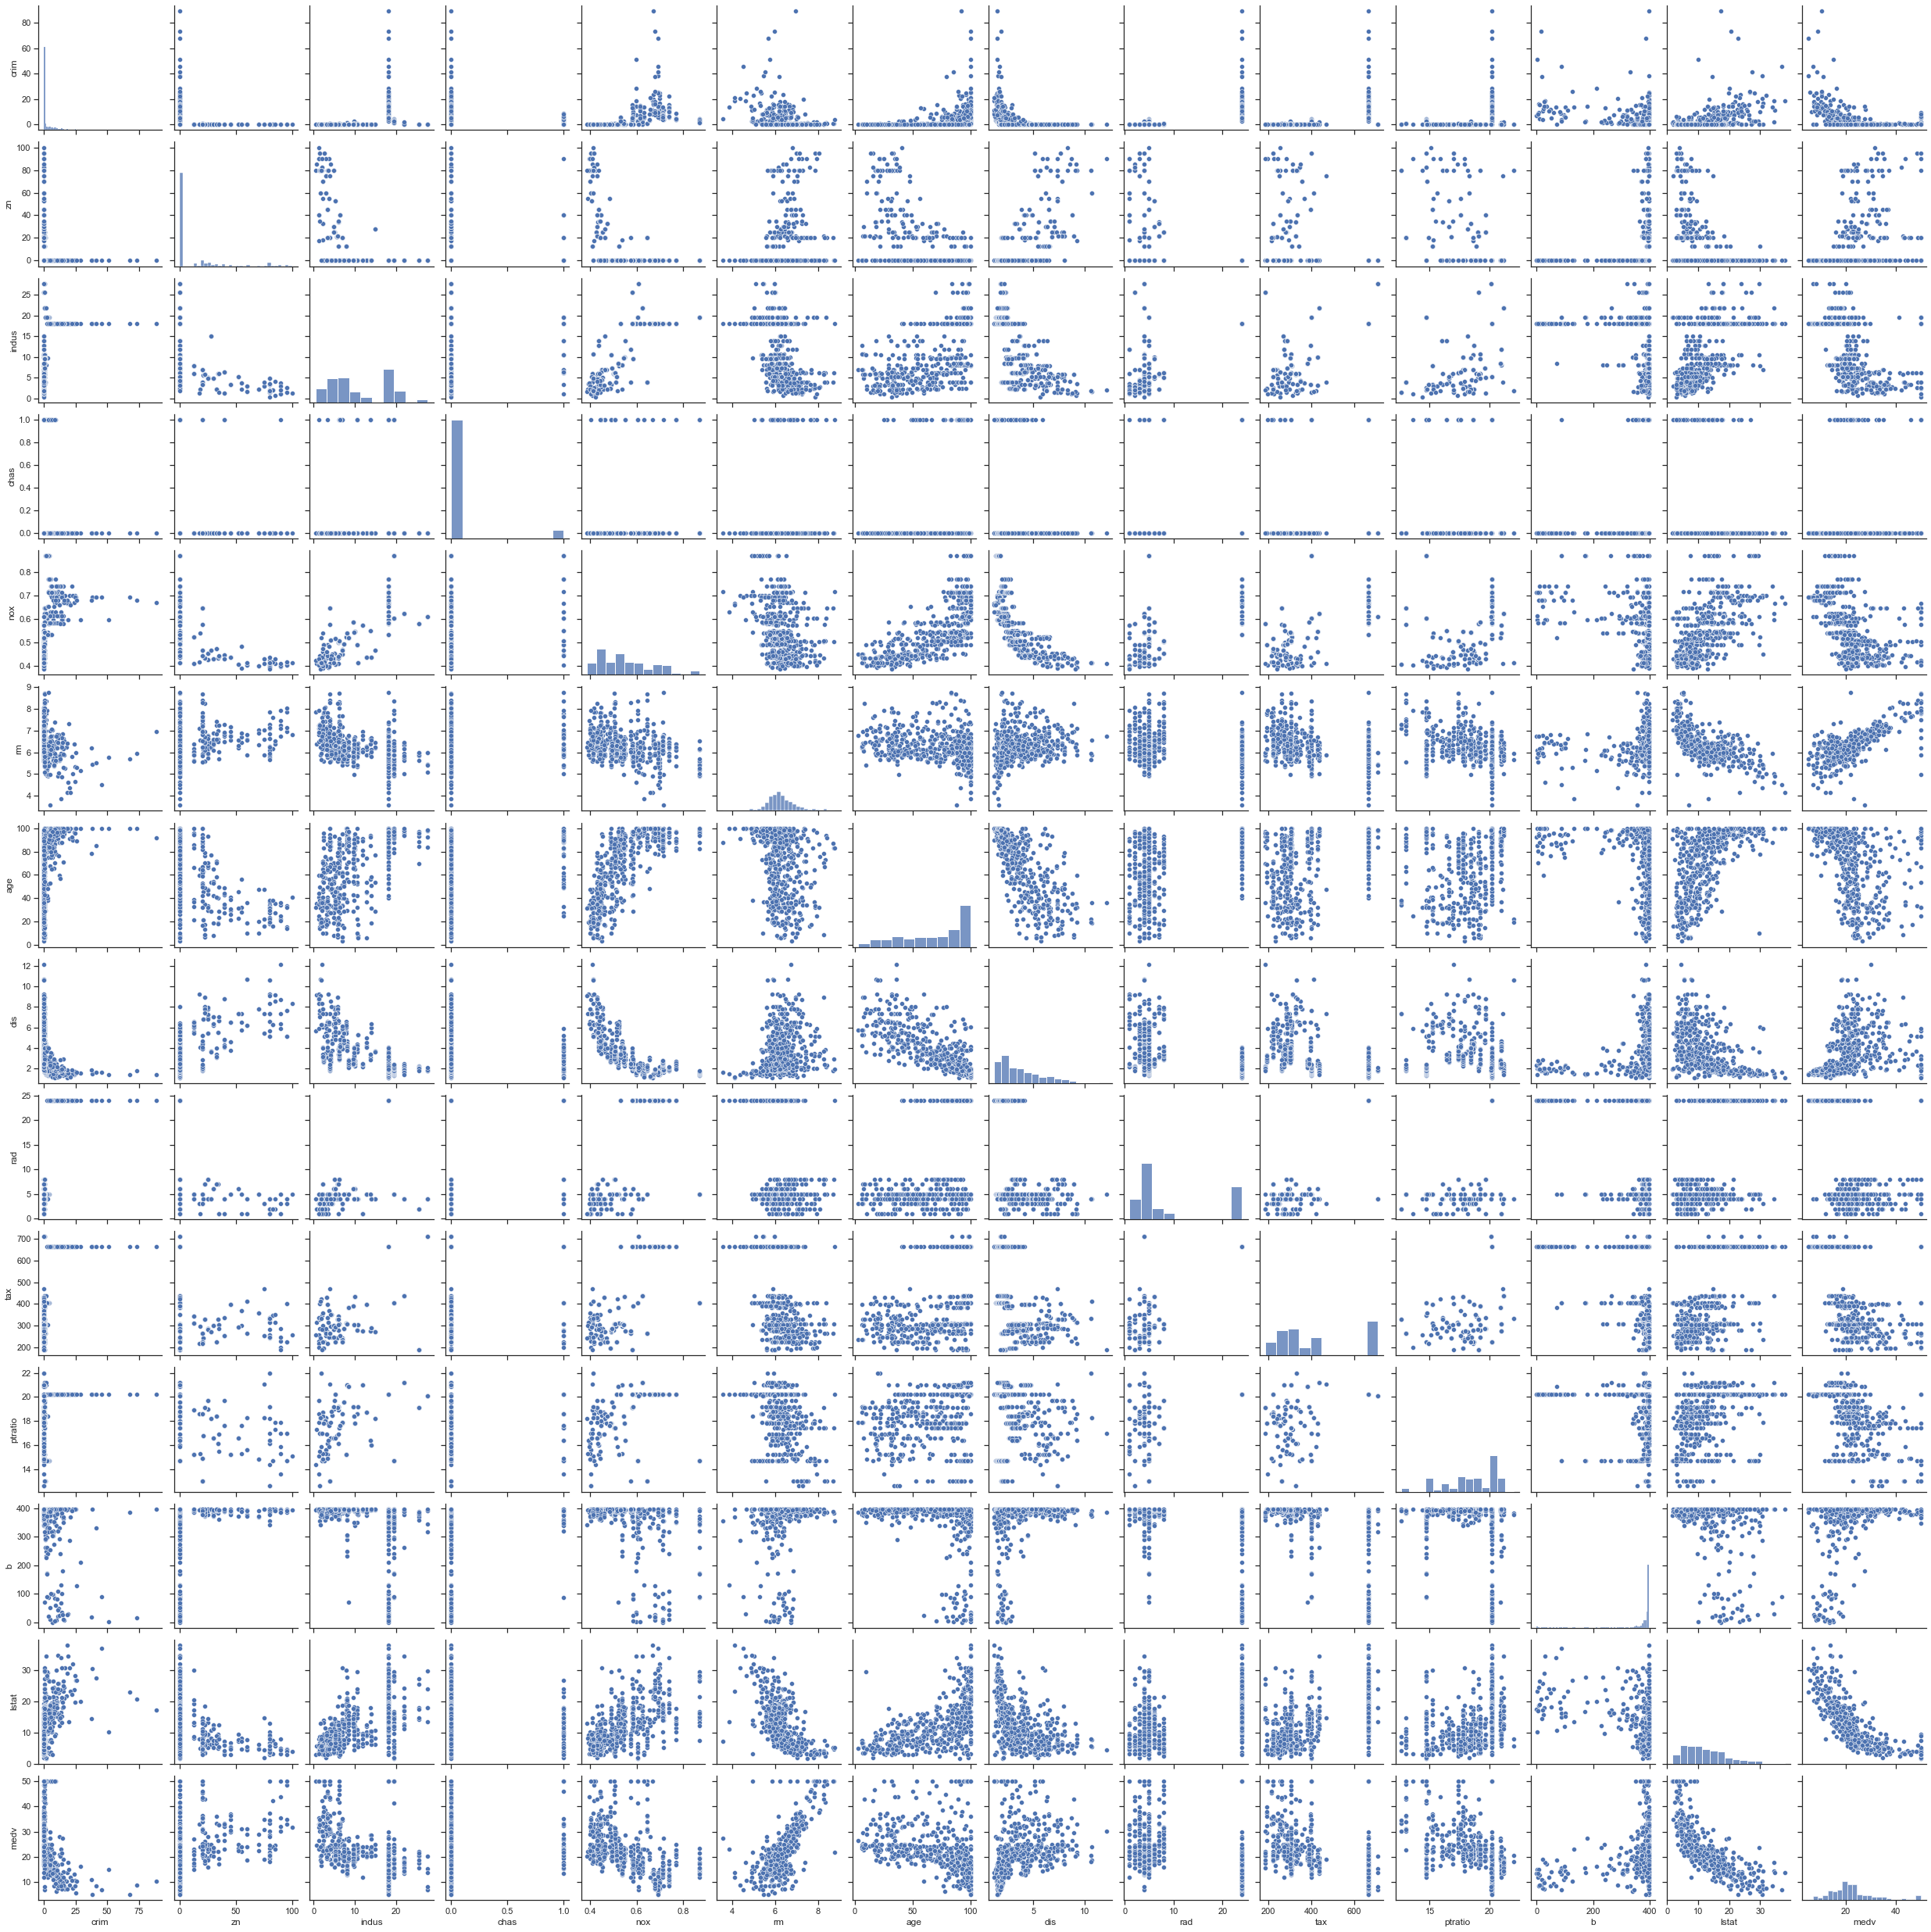

In [4]:
sns.pairplot(data)

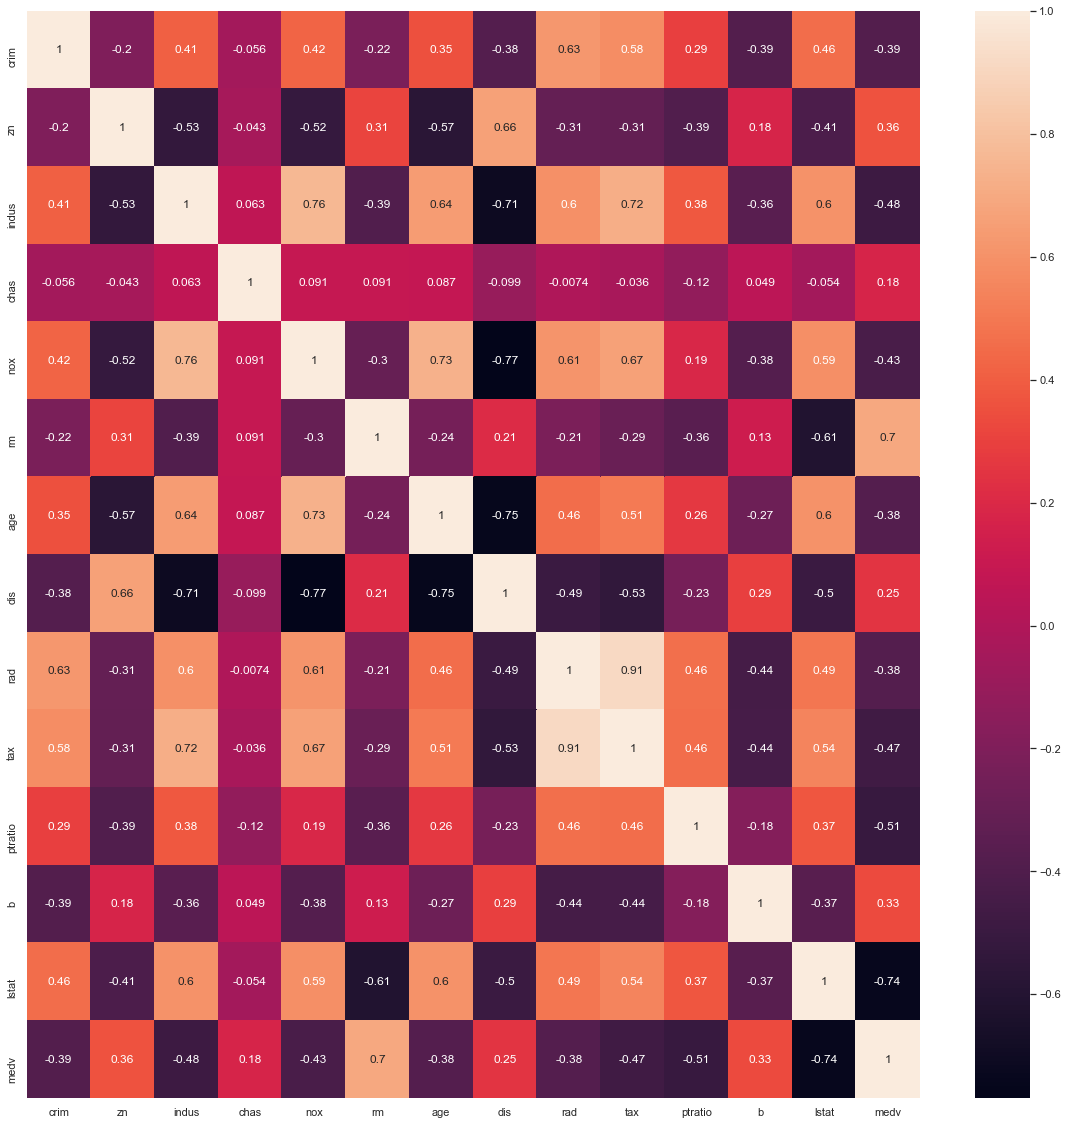

In [100]:
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True)
sns.set(rc={'figure.figsize':(20,20)})

In [101]:
data.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

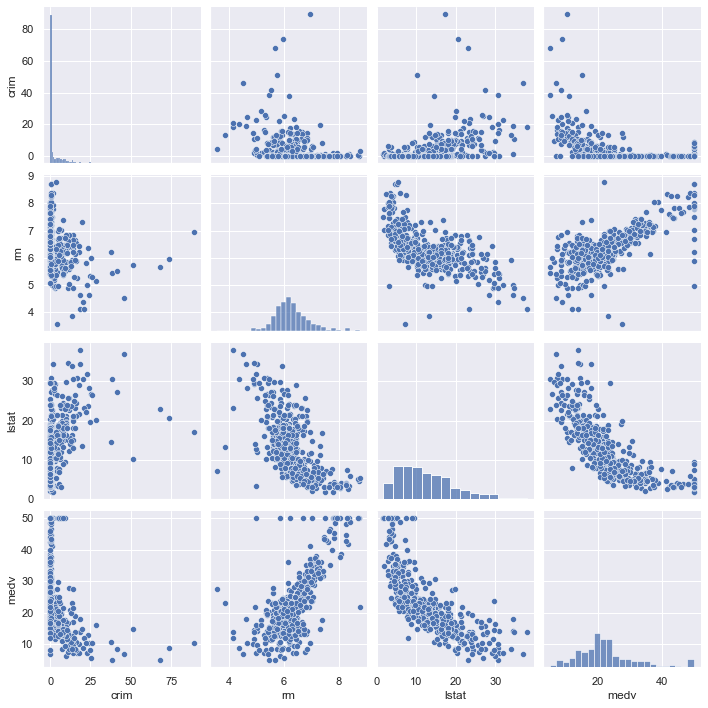

In [102]:
sns.pairplot(data.iloc[:,[0,5,12,13]])

In [103]:
data.iloc[:,5].head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: rm, dtype: float64

In [104]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [105]:
regr = linear_model.LinearRegression()

In [107]:
# Statistical Approach

Y = data['medv']
X = data.iloc[:,:-2]
'''sig2 = X['lstat'].std()**2
n_inv = 1/X['lstat'].shape[0]
x_mean = X['lstat'].mean()
x_mean2 = x_mean**2
sumxdiff2 = float(((X['lstat'] - x_mean)**2).sum())'''


SE = (sig2*( n_inv + x_mean2/sumxdiff2))**.5

Xtrain = X.iloc[:-100,:]
Ytrain = Y.iloc[:-100]
Xtest = X.iloc[-100:,:]
Ytest = Y.iloc[-100:]

for i in Xtrain:
    regr.fit(X[i].to_numpy().reshape(-1, 1), Y)
    Y_pred = regr.predict(X[i].to_numpy().reshape(-1, 1))
    tt = abs((stats.sem(X[i])/regr.coef_))
    pval = stats.t.sf(np.abs(tt), X[i].shape[0]-1)*2

    print(i)
    print('Intercept    : {}, SE: {}'.format(round(regr.intercept_,2), round(X[i].std(),3)))
    print('Coefficient  : ', regr.coef_)
    print('MSE          : ', mean_squared_error(Y, Y_pred))
    print('R^2          : ', r2_score(Y, Y_pred))
    print('Residuals    : Min ',round((Y-Y_pred).min(), 2),
                      ' 1stQ ', round((Y-Y_pred).quantile(.25), 2),
                      ' Med ', round((Y-Y_pred).median(), 2),
                      ' 3rdQ ', round((Y-Y_pred).quantile(.75), 2),
                      ' Max ', round((Y-Y_pred).max(), 2))
    print('t-statistic  : ', tt)
    print('p-value      : ', pval, '\n')
    


crim
Intercept    : 24.03, SE: 8.602
Coefficient  :  [-0.41519028]
MSE          :  71.69073588196659
R^2          :  0.15078046904975717
Residuals    : Min  -16.96  1stQ  -5.45  Med  -2.01  3rdQ  2.51  Max  29.8
t-statistic  :  [0.92098814]
p-value      :  [0.35749637] 

zn
Intercept    : 20.92, SE: 23.322
Coefficient  :  [0.14213999]
MSE          :  73.45169609475562
R^2          :  0.12992084489428946
Residuals    : Min  -15.92  1stQ  -5.52  Med  -1.01  3rdQ  2.76  Max  29.08
t-statistic  :  [7.29428411]
p-value      :  [1.16965967e-12] 

indus
Intercept    : 29.75, SE: 6.86
Coefficient  :  [-0.64849005]
MSE          :  64.6662216410753
R^2          :  0.2339900304444752
Residuals    : Min  -13.02  1stQ  -4.92  Med  -1.46  3rdQ  3.18  Max  32.94
t-statistic  :  [0.47029231]
p-value      :  [0.63834923] 

chas
Intercept    : 22.09, SE: 0.254
Coefficient  :  [6.34615711]
MSE          :  81.82651411931556
R^2          :  0.03071612970877491
Residuals    : Min  -17.09  1stQ  -5.89  Med  

In [108]:
data['medv_clean'] = data['medv'][data['medv'].between(data['medv'].quantile(0), data['medv'].quantile(.95))]
data = data.dropna()
data

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     ptratio       b  lstat  medv  medv_clean  
0       15.3  396.90   4.98  24.0        24.0  
1       17.8  396.90   9.14  21.6        21.6  
2       17.8  392.83   4.03  34.7        34.7  
3       18.7  394.63   2.94  33.4        33.4  
4       18.7  396.90   5.33  36.2        36.2  
..       ...     ...    ...   ...         ...  
501     21.0  391.99   9.67  22.4        22.4  
502     21.0  396.90   9.08  20.6        20.6  
503     21.0  396.90   5.64  23.9        23.9  
504     21.0  393.45   6.48  22.0        22.0  
505     21.0  396.90   7.88  11.9        11.9  

[480 rows x 15 columns]

In [109]:
Y = data['medv']
LstatSquare = pd.Series(data['lstat']**2, name='lstat^2')

In [110]:
LstatSquare.head()

0    24.8004
1    83.5396
2    16.2409
3     8.6436
4    28.4089
Name: lstat^2, dtype: float64

In [111]:
X = pd.DataFrame([data['lstat'], LstatSquare])

In [112]:
type(data['rm'])

pandas.core.series.Series

In [113]:
X = X.T

In [114]:
data.iloc[:,-1]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv_clean, Length: 480, dtype: float64

In [115]:
regr = linear_model.LinearRegression()

15.464525706356856
0.39614763148261245
[5.64, 36.98]
[31.809599999999996, 1367.5203999999999]
37.369240819517536 [-1.72131049  0.02957654]

 [1.86458226e-01 3.67318263e+02]
[0.85216438 0.        ]


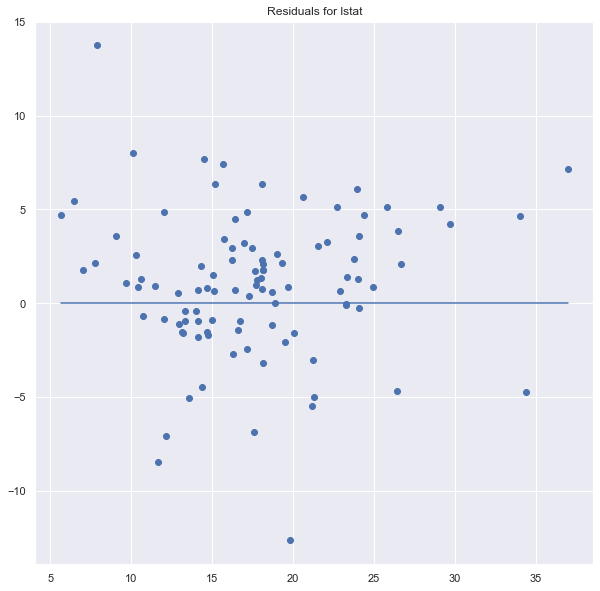

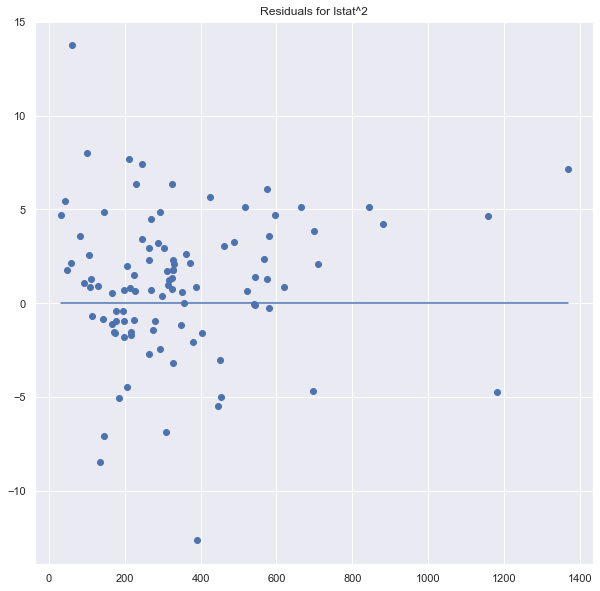

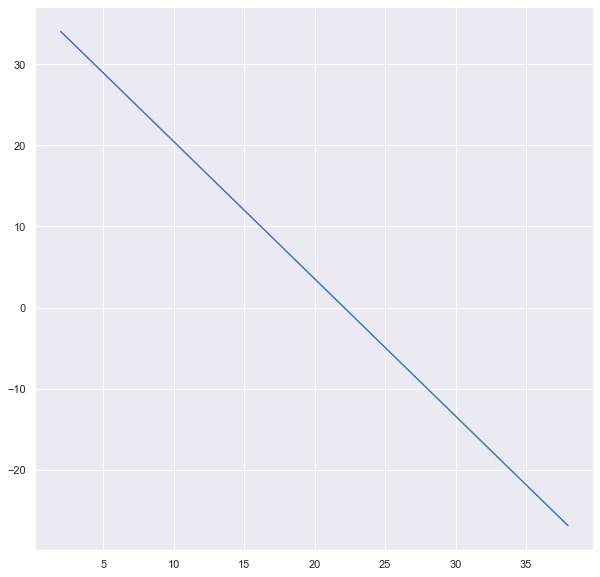

In [118]:
Y = data['medv']
LstatSquare = pd.Series(data['lstat']**2, name='lstat^2')
LstatCube = pd.Series(data['lstat']**3, name='lstat^3')
X = pd.DataFrame([data['lstat'], LstatSquare]).T

Xtrain = X.iloc[:-100,:]
Ytrain = Y.iloc[:-100]
Xtest = X.iloc[-100:,:]
Ytest = Y.iloc[-100:]

regr.fit(Xtrain, Ytrain)
Y_pred = regr.predict(Xtest)
print(mean_squared_error(Ytest, Y_pred))
print(r2_score(Ytest, Y_pred))
sns.set(rc={'figure.figsize':(10,10)})
for i in Xtest:
    plt.figure()
    plt.title('Residuals for {}'.format(i))
    x = [Xtest[i].min(),  Xtest[i].max()]
    y = [0, 0]
    print(x)
    plt.plot(x, y)
    plt.scatter(Xtest[i], (Y_pred - Ytest))
print(regr.intercept_, regr.coef_)
tt = abs((stats.sem(X)/regr.coef_))
pval = stats.t.sf(np.abs(tt), X.shape[0]-1)*2
print('\n', tt)
print(pval)

xreg=np.linspace(X['lstat'].min(),X['lstat'].max(),100)
yreg = (xreg[:,np.newaxis]*regr.coef_).sum(axis=1)+regr.intercept_
plt.figure()
plt.plot(xreg,yreg)

17.106464374096543
0.6601986807375451
[1.98, 37.97]
[3.9204, 1441.7208999999998]
[7.762392, 54742.142573]
39.03760869746533 [-2.16867320e+00  5.96118059e-02 -5.90191774e-04]

 [1.47994866e-01 1.82245819e+02 5.76878042e+05]
[0.8824091 0.        0.       ]


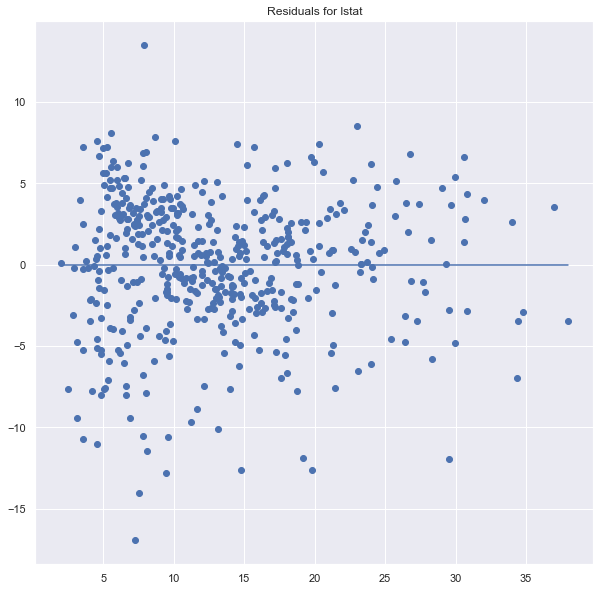

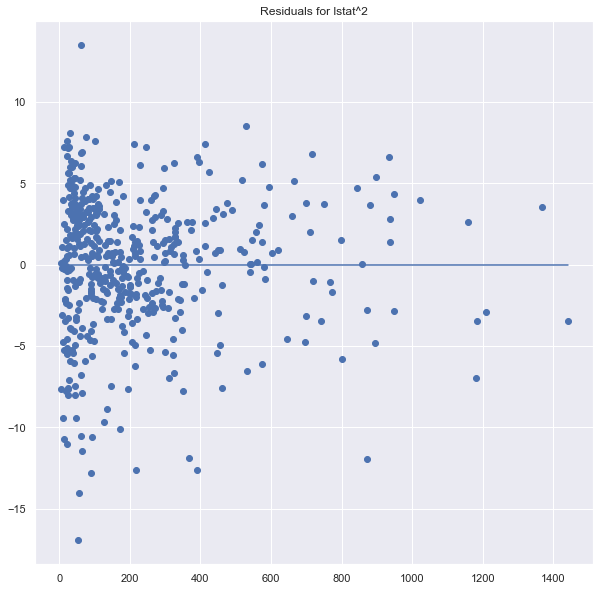

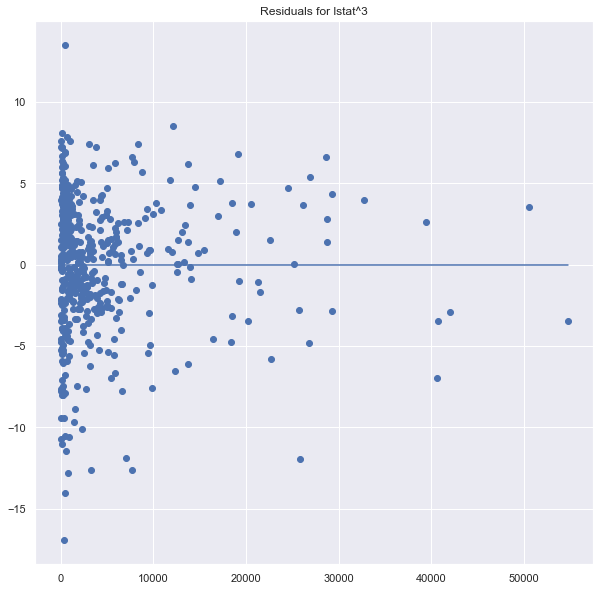

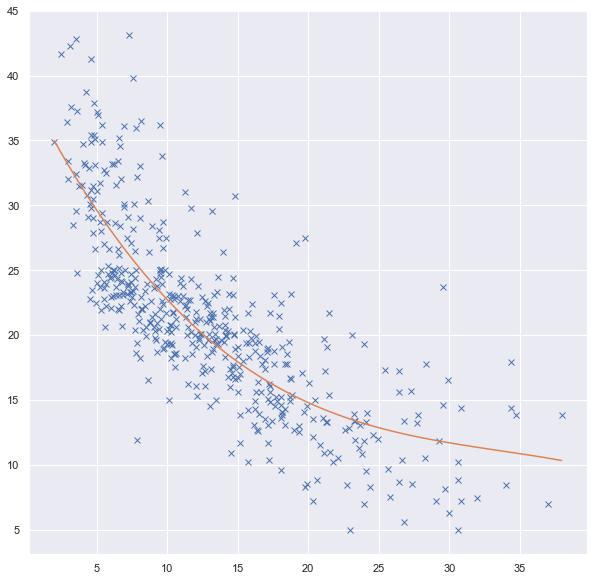

In [119]:
Y = data['medv']
LstatSquare = pd.Series(data['lstat']**2, name='lstat^2')
LstatCube = pd.Series(data['lstat']**3, name='lstat^3')
X = pd.DataFrame([data['lstat'], LstatSquare, LstatCube]).T

regr.fit(X, Y)
Y_pred = regr.predict(X)
print(mean_squared_error(Y, Y_pred))
print(r2_score(Y, Y_pred))
sns.set(rc={'figure.figsize':(10,10)})
for i in X:
    plt.figure()
    plt.title('Residuals for {}'.format(i))
    x = [X[i].min(),  X[i].max()]
    y = [0, 0]
    print(x)
    plt.plot(x, y)
    plt.scatter(X[i], (Y_pred - Y))
print(regr.intercept_, regr.coef_)
tt = abs((stats.sem(X)/regr.coef_))
pval = stats.t.sf(np.abs(tt), X.shape[0]-1)*2
print('\n', tt)
print(pval)

values = np.linspace(X['lstat'].min(),X['lstat'].max(),100)
xreg = np.array([values,values**2,values**3]).T
yreg = (xreg*regr.coef_).sum(axis=1)+regr.intercept_
plt.figure()
plt.plot(X['lstat'],Y, 'x')
plt.plot(xreg[:,0],yreg)

In [89]:
Y = data['medv']
X = pd.DataFrame([data['rm'],data['crim'],data['lstat'], data['lstat'], LstatSquare]).T

Xtrain = X.iloc[:-100,:]
Ytrain = Y.iloc[:-100]
Xtest = X.iloc[-100:,:]
Ytest = Y.iloc[-100:]

for i in Xtrain:
    regr.fit(Xtrain[i].to_numpy().reshape(-1, 1), Ytrain)
    Y_pred = regr.predict(Xtest[i].to_numpy().reshape(-1, 1))
    print(i)
    print('MSE      :',mean_squared_error(Ytest, Y_pred))
    print('R^2      :',r2_score(Ytest, Y_pred))
    print('Residuals: Min ',round((Ytest-Y_pred).min(), 2),
                      ' 1stQ ', round((Ytest-Y_pred).quantile(.25), 2),
                      ' Med ', round((Ytest-Y_pred).median(), 2),
                      ' 3rdQ ', round((Ytest-Y_pred).quantile(.75), 2),
                      ' Max ', round((Ytest-Y_pred).max(), 2),'\n')

rm
MSE      : 60.0597008366431
R^2      : -1.3451862211166716
Residuals: Min  -19.19  1stQ  -8.97  Med  -5.03  3rdQ  -0.87  Max  10.46 

crim
MSE      : 38.2837634737552
R^2      : -0.49488847497493826
Residuals: Min  -16.24  1stQ  -6.74  Med  -3.92  3rdQ  -0.73  Max  15.09 



ValueError: Found input variables with inconsistent numbers of samples: [760, 380]